<a href="https://colab.research.google.com/github/rishi217-k/Deeplearning/blob/main/DL(Lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/5
157/157 [==============================] - 117s 707ms/step - loss: 0.6774 - accuracy: 0.5809 - val_loss: 0.6618 - val_accuracy: 0.6032
Epoch 2/5
157/157 [==============================] - 93s 594ms/step - loss: 0.6343 - accuracy: 0.6479 - val_loss: 0.6405 - val_accuracy: 0.6162
Epoch 3/5
157/157 [==============================] - 94s 601ms/step - loss: 0.6015 - accuracy: 0.6729 - val_loss: 0.6243 - val_accuracy: 0.6268
Epoch 4/5
157/157 [==============================] - 88s 557ms/step - loss: 0.5641 - accuracy: 0.7038 - val_loss: 0.6264 - val_accuracy: 0.6478
Epoch 5/5
196/196 [==============================] - 8s 43ms/step - loss: 0.6201 - accuracy: 0.6630
Epoch 1/5
157/157 [==============================] - 33s 186ms/step - loss: 0.4884 - accuracy: 0.7465 - val_loss: 0.3702 - val_accuracy: 0.8356
Epoch 2/5
157/157 [==============================] - 19s 119ms/step - loss: 0.3014 - accuracy: 0.8775 - val_loss: 

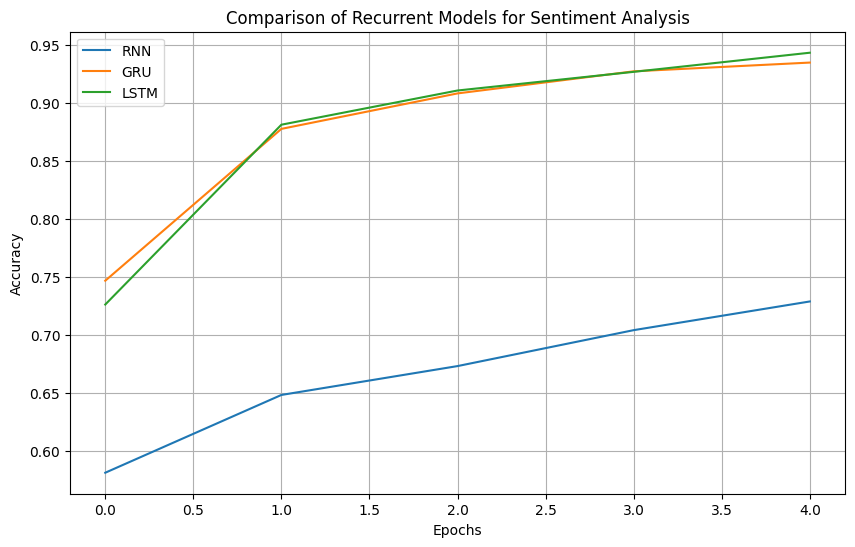

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence


max_words = 5000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

accuracies = []

model_names = ["RNN", "GRU", "LSTM"]

models = [
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        SimpleRNN(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        GRU(128),
        Dense(1, activation='sigmoid')
    ]),
    Sequential([
        Embedding(max_words, 100, input_length=max_length),
        LSTM(128),
        Dense(1, activation='sigmoid')
    ])
]


batch_size = 128
epochs = 5


histories = []

for model in models:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    histories.append(history)
    _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    accuracies.append(accuracy)


plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=model_names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()